In [4]:
import os
import argparse

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from PIL import Image # PIL is a library to process images
from matplotlib import pyplot as plt

from utils.data_helper import CustomDataset


In [5]:
def show_normalized_image(img, title=None):
    plt.imshow(unnormalize(img).detach().cpu().permute(1, 2, 0))
    plt.title(title)
    plt.axis('off')

torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])


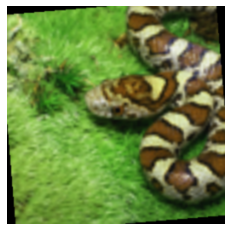

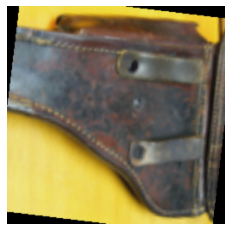

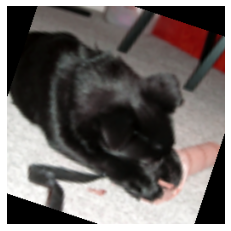

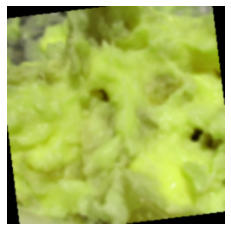

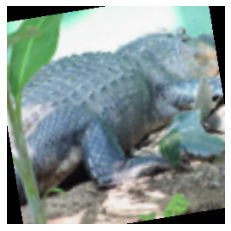

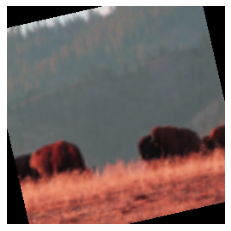

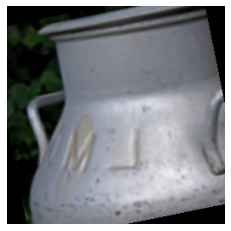

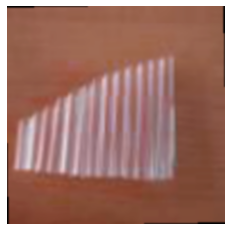

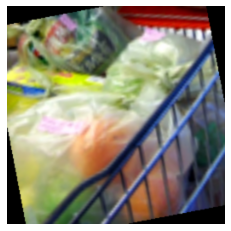

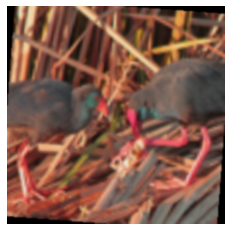

In [6]:
# These numbers are mean and std values for channels of natural images. 
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

# Inverse transformation: needed for plotting.
unnormalize = transforms.Normalize(
   mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
   std=[1/0.229, 1/0.224, 1/0.225]
)

train_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(hue=.1, saturation=.1, contrast=.1),
        transforms.RandomRotation(20, resample=Image.BILINEAR),
        transforms.GaussianBlur(7, sigma=(0.1, 1.0)),
        transforms.ToTensor(),  # convert PIL to Pytorch Tensor
        normalize,
    ])


trainset = CustomDataset(root='./dataset', split="train", transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=4)
for epoch in range(1):
    running_loss = 0.0
    count =0;
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()
        count +=1
        plt.figure()
        show_normalized_image(inputs[0])
        print(labels.shape)
       # plt.figure()
        #show_normalized_image(labels[0])
        if count ==10:
            break;
